### IMDB Review Sentiment Classification using RNN LSTM

Watch Full Video Here: https://youtu.be/UxiDUrOhnf4

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 89kB/s 
     |████████████████████████████████| 3.8MB 32.1MB/s 
     |████████████████████████████████| 450kB 32.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=260001ad5ed2932d88ab6e1269562a4a5e2ca527d06f40e9ae23ff8367e859fb
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
  Found existing installati

![alt text](https://miro.medium.com/max/2552/1*TmGtC3uYZboHh8GIG4N5tA.png)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [77]:
tf.__version__

'2.0.0'

### Dataset preprocessing 

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

In [81]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [85]:
X_train.shape

(25000, 100)

In [0]:
vocab_size = 20000
embed_size = 128

In [0]:
#Build LSTM Network

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [93]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_13 (LSTM)               (None, 60)                45360     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 18s 718us/sample - loss: 0.4282 - accuracy: 0.7980 - val_loss: 0.3414 - val_accuracy: 0.8482
Epoch 2/5
25000/25000 [==============================] - 15s 614us/sample - loss: 0.2321 - accuracy: 0.9122 - val_loss: 0.3495 - val_accuracy: 0.8478
Epoch 3/5
25000/25000 [==============================] - 15s 611us/sample - loss: 0.1482 - accuracy: 0.9467 - val_loss: 0.3977 - val_accuracy: 0.8400
Epoch 4/5
25000/25000 [==============================] - 15s 610us/sample - loss: 0.1025 - accuracy: 0.9646 - val_loss: 0.5926 - val_accuracy: 0.8183
Epoch 5/5
25000/25000 [==============================] - 16s 633us/sample - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.5665 - val_accuracy: 0.8300


In [95]:
history.history

{'accuracy': [0.79804, 0.91224, 0.94672, 0.9646, 0.97824],
 'loss': [0.4281533797931671,
  0.2321421627521515,
  0.1481593537926674,
  0.10248994267463685,
  0.06745858706116677],
 'val_accuracy': [0.84816, 0.84776, 0.84004, 0.81832, 0.83],
 'val_loss': [0.341396316075325,
  0.3494682068300247,
  0.3977368671512604,
  0.5926023301506043,
  0.5665433041572571]}

In [0]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

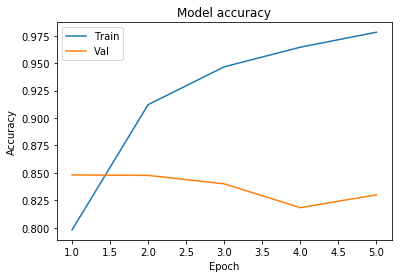

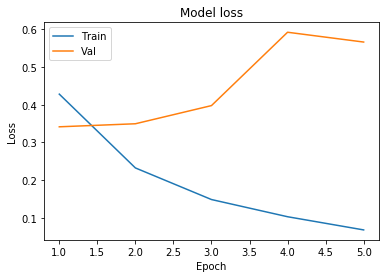

In [97]:
plot_learningCurve(history, 5)